In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
np.warnings.filterwarnings('ignore')

In [7]:
# Решите линейную систему:

A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

In [8]:
# либо

A1 = np.linalg.inv(A)
print(A1)
print("Детерминант = {0}".format(np.linalg.det(A)))
np.dot(A1, B)

[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
Детерминант = 59.999999999999986


array([-9.2       ,  0.9       ,  6.46666667])

In [5]:
# Найдите псевдорешение:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])

np.linalg.lstsq(A, B)



(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [18]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
B = np.array([[12, 2, 1]]) 
C = np.concatenate((A,B.T), axis=1) 

print(C)

if(np.linalg.matrix_rank(A, 0.0001) < np.linalg.matrix_rank(C, 0.0001)):
    print('Система не имеет решения - Ранг основной матрицы меньше ранга расширенной матрицы')


[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
Система не имеет решения - Ранг основной матрицы меньше ранга расширенной матрицы


In [23]:
# Бесконечно много решений будет иметь система если изменить правую часть на вектор [1, 2, 3]
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
B = np.array([[1, 2, 3]])
C = np.concatenate((A,B.T), axis=1) 
print(C)
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))
print('Система имеет бесконечно много решений и задается решение системой: x + 2y + 3z = 1 и x + y + z = 1')

[[1 2 3 1]
 [4 5 6 2]
 [7 8 9 3]]
2 2
Система имеет бесконечно много решений


In [27]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]]) 
B = np.array([12, 2, 1])
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))
print('Система имеет решение: {0}'.format(np.linalg.solve(A, B)))


3 3
Система имеет решение: [-9.2         0.9         6.46666667]


In [41]:
# Вычислите LU-разложение матрицы:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
print((np.dot(P, A) - np.dot(L, U)))
B = np.array([2, 4, 9])
print('Система имеет решение: {0}'.format(np.linalg.solve(A, B)))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]
Система имеет решение: [ 1.98611111 -0.03472222  0.02777778]


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

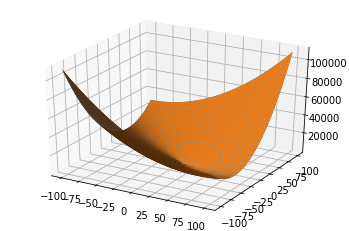

In [53]:
# 5. Найдите нормальное псевдорешение недоопределенной системы:

def Q(x, y, z):
    return (x**2 + y**2 + z**2)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

x = np.linspace(-100, 100, 500)
y = np.linspace(-100, 100, 500)

x1, y1 = np.meshgrid(x, y)
x2, y2 = np.meshgrid(x, y)

f1 = lambda x, y: x + 2 * y - 1
f2 = lambda x, y: 12 + 5 * y - 8 * x
z1 = f1(x1, y1)
z2 = f1(x2, y2)

ax.plot_surface(x1, y1, Q(x1, y1, z1), rstride = 10, cstride = 10)
ax.plot_surface(x2, y2, Q(x2, y2, z2), rstride = 10, cstride = 10)


A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

np.linalg.lstsq(A, B)

In [56]:
# Найдите одно из псевдорешений вырожденной системы:

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
B = np.array([[2, 5, 11]])

Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.55111512e-16 -2.77555756e-16]
 [-5.55111512e-16  1.00000000e+00  5.68989300e-16]
 [-2.77555756e-16  5.68989300e-16  1.00000000e+00]]
